<a href="https://colab.research.google.com/github/86lekwenshiung/Graph-Network-for-Fraud-Analysis/blob/main/Graph_Network_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.0 Import Libraries
___

In [1]:
# General Utility
import os
import pandas as pd
import numpy as np
import random
import re
pd.set_option('display.max_column' , None)

# Network and Graph Related
import plotly.graph_objects as go
import networkx as nx


# !pip install igraph



# https://melaniewalsh.github.io/Intro-Cultural-Analytics/06-Network-Analysis/02-Making-Network-Viz-with-Bokeh.html
# https://melaniewalsh.github.io/Intro-Cultural-Analytics/06-Network-Analysis/01-Network-Analysis.html
# https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259
# https://towardsdatascience.com/how-to-download-and-visualize-your-twitter-network-f009dbbf107b

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 0.1 Sample Visual by Plotly
___ 

In [ ]:
# edge_x = []
# edge_y = []
# for edge in G.edges():
#     x0, y0 = G.nodes[edge[0]]['pos']
#     x1, y1 = G.nodes[edge[1]]['pos']
#     edge_x.append(x0)
#     edge_x.append(x1)
#     edge_x.append(None)
#     edge_y.append(y0)
#     edge_y.append(y1)
#     edge_y.append(None)

# edge_trace = go.Scatter(
#     x=edge_x, y=edge_y,
#     line=dict(width=0.5, color='#888'),
#     hoverinfo='none',
#     mode='lines')

# node_x = []
# node_y = []
# for node in G.nodes():
#     x, y = G.nodes[node]['pos']
#     node_x.append(x)
#     node_y.append(y)

# node_trace = go.Scatter(
#     x=node_x, y=node_y,
#     mode='markers',
#     hoverinfo='text',
#     marker=dict(
#         showscale=True,
#         # colorscale options
#         #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
#         #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
#         #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
#         colorscale='YlGnBu',
#         reversescale=True,
#         color=[],
#         size=10,
#         colorbar=dict(
#             thickness=15,
#             title='Node Connections',
#             xanchor='left',
#             titleside='right'
#         ),
#         line_width=2))

In [ ]:
# node_adjacencies = []
# node_text = []
# for node, adjacencies in enumerate(G.adjacency()):
#     node_adjacencies.append(len(adjacencies[1]))
#     node_text.append('# of connections: '+str(len(adjacencies[1])))

# node_trace.marker.color = node_adjacencies
# node_trace.text = node_text

In [ ]:
# fig = go.Figure(data=[edge_trace, node_trace],
#              layout=go.Layout(
#                 title='<br>Network graph made with Python',
#                 titlefont_size=16,
#                 showlegend=False,
#                 hovermode='closest',
#                 margin=dict(b=20,l=5,r=5,t=40),
#                 annotations=[ dict(
#                     text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
#                     showarrow=False,
#                     xref="paper", yref="paper",
#                     x=0.005, y=-0.002 ) ],
#                 xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#                 yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
#                 )
# fig.show()

### 0.5 General Function
___

In [3]:
def random_sentence_reader(df , col):
  sample_sentence = random.choice(df[col])

  return sample_sentence

In [20]:
import re
def split_text(text, match):	
    text = re.sub(r"\n\t", "", text)
    return re.split(match, text)

#=== create a function to extract proper text from the email body
def extract_body(text, substr):	
    result = re.split(substr, text)[-1]
    result = re.sub(r"([\n-])", "", result)
    return result

#=== clean up the data fields
#- function to extract email addresses
def extract_emails(text, substr):
    result = re.findall("[^\s]+@[\w]+.[\w]+", str(text))
    if substr not in text:
        result = ""
    return result

#- function to extract subject
def extract_subject(text):

    list_of_words = re.split("\s", text)
    words_to_drop = ["Subject:","re:","Re:","RE:","fw:","Fw:", "FW:"]

    desired_words = []
    for word in list_of_words:
        if word not in words_to_drop:
            desired_words.append(word)

    r = re.compile("[\w]{3,}")
    final_list = list(filter(r.match, desired_words))

    return final_list 

#- function to extract the name of entity
def extract_entity(text):	
    string = ""
    for i in text:
        string = string + " " + i

    list_of_emails = list(re.findall(r"@[\w]+", string))	
    result = []
    for item in list_of_emails:		
        result.append(item[1:])

    return set(result)

# 2.0 Turning DataFrame into Graph
___

In [5]:
data_path = '/content/gdrive/MyDrive/Graph Network for Fraud Analysis/data'

for dirpath, dirnames, filenames in os.walk(data_path):
    print(f'There are {len(filenames)} files and {len(dirnames)} in {dirpath}')

train_path = '/content/gdrive/MyDrive/Graph Network for Fraud Analysis/data/Train_Outpatientdata-1542865627584.csv'
df = pd.read_csv(train_path)   

There are 9 files and 0 in /content/gdrive/MyDrive/Graph Network for Fraud Analysis/data


In [6]:
print('DF Shape',df.shape)
df.head()

DF Shape (517737, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


### 2.1 Assigning Source and Target
___

In [7]:
source = 'Provider'
target = 'AttendingPhysician'

#Turn df into graph
G = nx.from_pandas_edgelist(df[:500], source=source, target = target)

pos = nx.spring_layout(G) #specify layout for visual

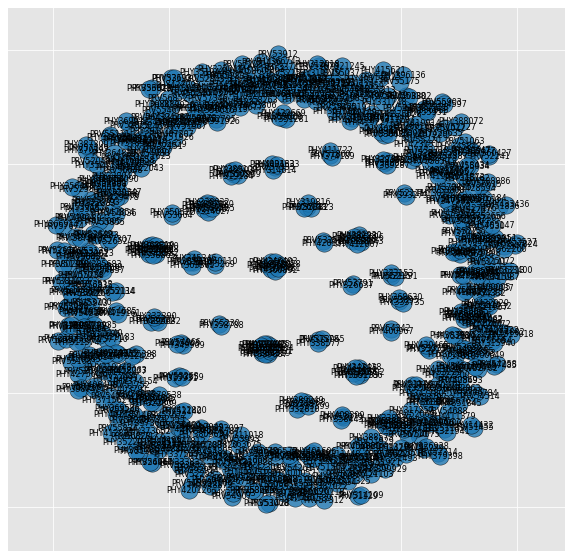

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos,
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2);

In [ ]:
G.number_of_nodes()

705

#### 2.1.1 Checking Number of Connection By Degree
___

In [ ]:
nx.degree(G)

DegreeView({'PRV56011': 11, 'PHY326117': 1, 'PRV57610': 1, 'PHY362868': 1, 'PRV57595': 1, 'PHY328821': 1, 'PHY334319': 1, 'PHY403831': 1, 'PHY339887': 1, 'PHY345721': 1, 'PHY346833': 1, 'PHY372925': 1, 'PHY412904': 1, 'PRV55951': 1, 'PHY381511': 1, 'PHY396851': 1, 'PRV55903': 1, 'PHY394597': 1, 'PHY409445': 1, 'PHY385446': 1, 'PRV54080': 2, 'PHY406867': 1, 'PHY372623': 1, 'PRV54064': 1, 'PHY419180': 1, 'PRV52038': 1, 'PHY418135': 1, 'PRV53918': 1, 'PHY330576': 1, 'PRV56743': 1, 'PHY397708': 1, 'PRV56559': 3, 'PHY374574': 1, 'PHY383588': 1, 'PRV57710': 1, 'PHY429183': 1, 'PRV52935': 1, 'PHY341325': 1, 'PRV56454': 2, 'PHY349882': 1, 'PHY323051': 1, 'PRV56213': 1, 'PHY333400': 1, 'PRV52314': 1, 'PHY379398': 1, 'PRV51012': 1, 'PHY429635': 1, 'PRV51063': 1, 'PHY345842': 1, 'PRV52587': 2, 'PHY380963': 1, 'PHY417949': 1, 'PRV52559': 2, 'PHY322586': 1, 'PRV52679': 2, 'PHY408399': 1, 'PRV52614': 1, 'PHY335165': 1, 'PHY405131': 1, 'PRV52684': 1, 'PHY403155': 1, 'PRV52795': 1, 'PHY391926': 1, 'PH

In [ ]:
# https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html
"""
A DegreeView for the Graph as G.degree or G.degree().
The node degree is the number of edges adjacent to the node. The weighted node degree is the sum of the edge weights for edges incident to that node.
This object provides an iterator for (node, degree) as well as lookup for the degree for a single node.
"""

G_sorted = pd.DataFrame(sorted(G.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['nconst','degree']
G_sorted[:10]

,nconst,degree
0,PRV56011,11
1,PRV52064,9
2,PRV56416,7
3,PRV51459,6
4,PRV57103,6
5,PRV54837,6
6,PRV52568,6
7,PRV56689,5
8,PRV54761,4
9,PRV54885,4


#### 2.1.2 Checking Number of connection by weighted Degree (Place Holder)
___

In [ ]:
weighted_degrees = dict(nx.degree(G , weight = 'weighted'))
# nx.set_node_attributes(G , name = 'weighted_degree' , values = weighted_degrees)

In [ ]:
G_sorted_weighted = pd.DataFrame(G.nodes(data = 'weighted_degree') , columns = ['nconst','weighted_degree'])
G_sorted_weighted.sort_values(by = 'weighted_degree' , ascending = False)[:10]

,nconst,weighted_degree
0,PRV56011,None
1,PHY326117,None
2,PRV57610,None
3,PHY362868,None
4,PRV57595,None
5,PHY328821,None
6,PHY334319,None
7,PHY403831,None
8,PHY339887,None
9,PHY345721,None


### 2.2 Checking Centrality Score (Wikipedia Definition)
___

- betweenness centrality (or "betweeness centrality") is a measure of centrality in a graph based on shortest paths. For every pair of vertices in a connected graph, there exists at least one shortest path between the vertices such that either the number of edges that the path passes through (for unweighted graphs) or the sum of the weights of the edges (for weighted graphs) is minimized. The betweenness centrality for each vertex is the number of these shortest paths that pass through the vertex.

- Betweenness centrality was devised as a general measure of centrality.

In [ ]:
# nx.betweenness_centrality(G)

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)

In [ ]:
nx.set_node_attributes(G , name = 'betweenness' , values = betweenness_centrality)

In [ ]:
G_betweeness_df = pd.DataFrame(G.nodes(data = 'betweenness') , columns = ['nconst','betweenness'])
G_betweeness_df.sort_values(by = 'betweenness' , ascending = False)[:10]

,nconst,betweenness
0,PRV56011,0.000222
210,PRV52064,0.000145
605,PRV56416,0.000085
155,PRV54837,0.000061
137,PRV57103,0.000061
571,PRV52568,0.000061
132,PRV51459,0.000061
226,PRV56689,0.000040
700,PRV53797,0.000024
216,PRV55039,0.000024


In [ ]:
#Exclude nodes with degree less than 7
# G_tmp = nx.k_core(G, 1) 
G_tmp  = G
G_tmp.number_of_nodes()

705

In [ ]:
from community import community_louvain
partition = community_louvain.best_partition(G_tmp)
#Turn partition into dataframe
partition1 = pd.DataFrame([partition]).T
partition1 = partition1.reset_index()
partition1.columns = ['names','group']

In [ ]:
G_sorted = pd.DataFrame(sorted(G_tmp.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['names','degree']
G_sorted.head()
dc = G_sorted

In [ ]:
G_sorted.head()

,names,degree
0,PRV56011,11
1,PRV52064,9
2,PRV56416,7
3,PRV51459,6
4,PRV57103,6


In [ ]:
partition1.head()

,names,group
0,PRV56011,0
1,PHY326117,0
2,PRV57610,1
3,PHY362868,1
4,PRV57595,2


In [ ]:
combined = pd.merge(dc,partition1, how='left', left_on="names",right_on="names")
combined.head()

,names,degree,group
0,PRV56011,11,0
1,PRV52064,9,87
2,PRV56416,7,252
3,PRV51459,6,55
4,PRV57103,6,56


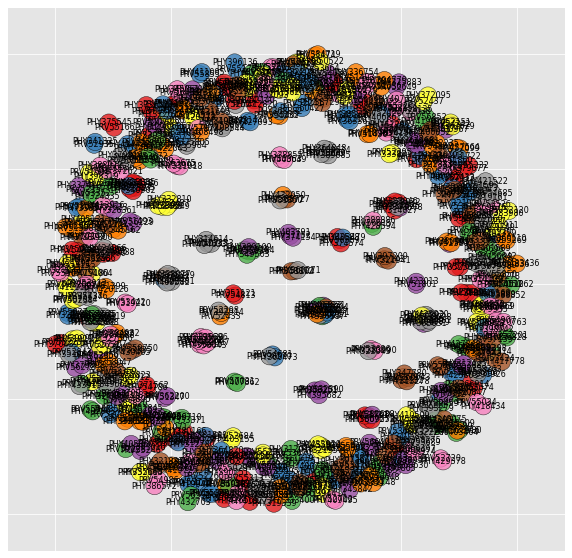

In [ ]:
pos = nx.spring_layout(G_tmp)
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
#cc = nx.betweenness_centrality(G2)
nodes = nx.draw_networkx_nodes(G_tmp, pos,
                               cmap=plt.cm.Set1,
                               node_color=combined['group'],
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G_tmp, pos, font_size=8)
nx.draw_networkx_edges(G_tmp, pos, width=1.0, alpha=0.2)
plt.savefig('sample_data.png')

### 2.3 Exporting to CSV for Gephi
___

In [ ]:
#I've found Gephi really likes when your node column is called 'Id'
combined = combined.rename(columns={"names": "Label"}) 
edges = nx.to_pandas_edgelist(G_tmp)
nodes = combined['Label']
edges.to_csv("edges.csv" , index_label = 'Id')
combined.to_csv("nodes.csv" , index_label = 'Id')

In [ ]:
edges.head()

,source,target
0,PRV56011,PHY326117
1,PRV56011,PHY334319
2,PRV56011,PHY403831
3,PRV56011,PHY339887
4,PRV56011,PHY345721


In [ ]:
!wget 'https://raw.githubusercontent.com/86lekwenshiung/Graph-Network-for-Fraud-Analysis/main/image/Sample%20Image%20Gephi.PNG'

--2021-12-09 09:35:36--  https://raw.githubusercontent.com/86lekwenshiung/Graph-Network-for-Fraud-Analysis/main/image/Sample%20Image%20Gephi.PNG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21815 (21K) [image/png]
Saving to: ‘Sample Image Gephi.PNG’

Sample Image Gephi. 100%[===================>]  21.30K  --.-KB/s    in 0.001s  

2021-12-09 09:35:36 (16.6 MB/s) - ‘Sample Image Gephi.PNG’ saved [21815/21815]



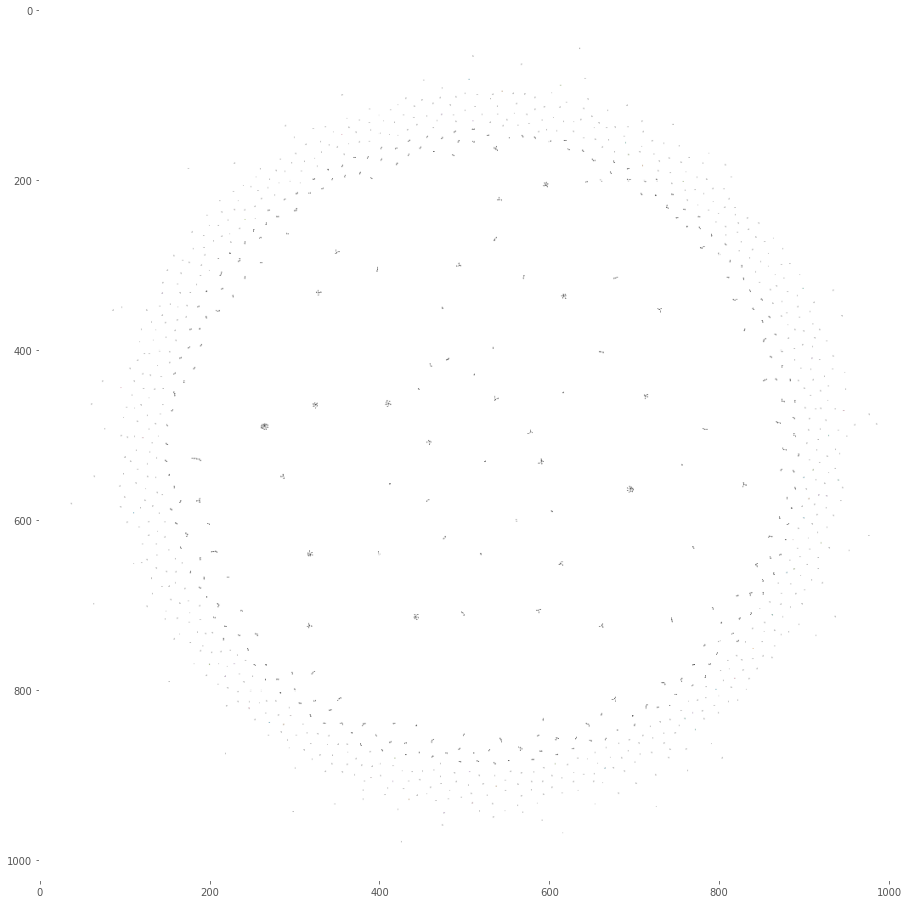

In [ ]:
# Sample Image From Gephi
plt.figure(figsize = (16,16))

img = plt.imread('/content/Sample Image Gephi.PNG')

plt.imshow(img);

# 3.0 Reading in Enron Dataset
___

In [11]:
enron_email_path  = '/content/gdrive/MyDrive/Graph Network for Fraud Analysis/data/emails.csv'

df_email = pd.read_csv(enron_email_path)

In [12]:
df_email.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


### 3.1 Reading Sample Raw Email and Split Email by New Line
___

In [13]:
# Sample Enron Email
sample_message = random.choice(df_email['message'])
sample_message

'Message-ID: <27240695.1075840094692.JavaMail.evans@thyme>\nDate: Mon, 9 Aug 1999 20:09:00 -0700 (PDT)\nFrom: markskilling@hotmail.com\nTo: fly_soft@classic.msm.com, ak1992@yahoo.com, jalibow@yahoo.com, \n\trobdbogey@aol.com, cp253w16@aol.com, oldenlaw@sirius.com, \n\tmajalinda@hotmail.com, ksbiehl@hotmail.com, \n\tdlmackler@worldnet.att.net, cjones@cityofnapa.org, \n\thazerfen@hotmail.com, tomskilljr@aol.com, ckc@mindspring.com, \n\tmshachat@aol.com, clowes@email.msn.com, clowes@cmithlaw.com, \n\ttranswd@aol.com, smackarnes@aol.com, samjstokes@aol.com, \n\tjoguti@aol.com, lja49@gateway.net, dwood@rwblaw.com, \n\tdaveroche@aol.com, milobenn@sirius.com, pwc1@aol.com, \n\tcandc@ix.netcom.com, eisenbachrl@cooley.com, mwf15@columbia.edu, \n\tkhuber@hcmwealth.com, katekross@aol.com, mlangermann@2onesource.com, \n\tmartin@sbu.edu, deniz.razon@abbott.com, sras@lycosmail.com, \n\tjeff.skilling@enron.com, tskilling@tribune.com, \n\taudryn@mindspring.com, mmmmisha@ix.netcom.com, ermak@gte.net\nS

In [14]:
# Sample Enrol Email Split by newline
sample_message_split = sample_message.split('\n')
sample_message_split

['Message-ID: <27240695.1075840094692.JavaMail.evans@thyme>',
 'Date: Mon, 9 Aug 1999 20:09:00 -0700 (PDT)',
 'From: markskilling@hotmail.com',
 'To: fly_soft@classic.msm.com, ak1992@yahoo.com, jalibow@yahoo.com, ',
 '\trobdbogey@aol.com, cp253w16@aol.com, oldenlaw@sirius.com, ',
 '\tmajalinda@hotmail.com, ksbiehl@hotmail.com, ',
 '\tdlmackler@worldnet.att.net, cjones@cityofnapa.org, ',
 '\thazerfen@hotmail.com, tomskilljr@aol.com, ckc@mindspring.com, ',
 '\tmshachat@aol.com, clowes@email.msn.com, clowes@cmithlaw.com, ',
 '\ttranswd@aol.com, smackarnes@aol.com, samjstokes@aol.com, ',
 '\tjoguti@aol.com, lja49@gateway.net, dwood@rwblaw.com, ',
 '\tdaveroche@aol.com, milobenn@sirius.com, pwc1@aol.com, ',
 '\tcandc@ix.netcom.com, eisenbachrl@cooley.com, mwf15@columbia.edu, ',
 '\tkhuber@hcmwealth.com, katekross@aol.com, mlangermann@2onesource.com, ',
 '\tmartin@sbu.edu, deniz.razon@abbott.com, sras@lycosmail.com, ',
 '\tjeff.skilling@enron.com, tskilling@tribune.com, ',
 '\taudryn@mindspr

In [15]:
print('Sample Date Extract: ' , sample_message.split('\n')[1])
print('Sample Sender: ' , sample_message.split('\n')[2])
print('Sample Receipant: ' , sample_message.split('\n')[3])
print('Sample Subject: ' , sample_message.split('\n')[4])
print('Sample cc: ' , sample_message.split('\n')[5])
print('Sample bcc: ' , sample_message.split('\n')[9])

Sample Date Extract:  Date: Mon, 9 Aug 1999 20:09:00 -0700 (PDT)
Sample Sender:  From: markskilling@hotmail.com
Sample Receipant:  To: fly_soft@classic.msm.com, ak1992@yahoo.com, jalibow@yahoo.com, 
Sample Subject:  	robdbogey@aol.com, cp253w16@aol.com, oldenlaw@sirius.com, 
Sample cc:  	majalinda@hotmail.com, ksbiehl@hotmail.com, 
Sample bcc:  	transwd@aol.com, smackarnes@aol.com, samjstokes@aol.com, 


In [22]:
df_email["message_tidy"] = df_email.message.apply(lambda x : split_text(x, "\n"))

In [23]:
# for i in range(df_email.shape[0]):
#   df_email.loc[i , 'date'] = df_email['message'][i].split('\n')[1]
#   df_email.loc[i , 'sender'] = df_email['message'][i].split('\n')[2]
#   df_email.loc[i , 'receipant'] = df_email['message'][i].split('\n')[3]
#   df_email.loc[i , 'subject'] = df_email['message'][i].split('\n')[4]


df_email["date"] = df_email.message_tidy.apply(lambda x : x[1])
df_email["sender_email"] = df_email.message_tidy.apply(lambda x : x[2])
df_email["recipient_email"] = df_email.message_tidy.apply(lambda x : x[3])
df_email["subject"] = df_email.message_tidy.apply(lambda x : x[4])
df_email["cc"] = df_email.message_tidy.apply(lambda x : x[5])
df_email["bcc"] = df_email.message_tidy.apply(lambda x : x[9])
df_email["body"] = df_email.message.apply(lambda x : extract_body(x, r"X-FileName: [\w]*[\s]*[(Non\-Privileged).pst]*[\w-]*[.nsf]").strip())

In [24]:
df_email

,file,message,message_tidy,date,sender_email,recipient_email,subject,cc,bcc,body
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,[Message-ID: <18782981.1075855378110.JavaMail....,"Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)",From: phillip.allen@enron.com,To: tim.belden@enron.com,Subject:,Mime-Version: 1.0,X-To: Tim Belden <Tim Belden/Enron@EnronXGate>,tHere is our forecast
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,[Message-ID: <15464986.1075855378456.JavaMail....,"Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)",From: phillip.allen@enron.com,To: john.lavorato@enron.com,Subject: Re:,Mime-Version: 1.0,X-To: John J Lavorato <John J Lavorato/ENRON@e...,tTraveling to have a business meeting takes th...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,[Message-ID: <24216240.1075855687451.JavaMail....,"Date: Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",From: phillip.allen@enron.com,To: leah.arsdall@enron.com,Subject: Re: test,Mime-Version: 1.0,X-To: Leah Van Arsdall,test successful. way to go!!!
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,[Message-ID: <13505866.1075863688222.JavaMail....,"Date: Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",From: phillip.allen@enron.com,To: randall.gay@enron.com,Subject:,Mime-Version: 1.0,X-To: Randall L Gay,"Randy, Can you send me a schedule of the salar..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,[Message-ID: <30922949.1075863688243.JavaMail....,"Date: Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",From: phillip.allen@enron.com,To: greg.piper@enron.com,Subject: Re: Hello,Mime-Version: 1.0,X-To: Greg Piper,Let's shoot for Tuesday at 11:45.
...,...,...,...,...,...,...,...,...,...,...
517396,zufferli-j/sent_items/95.,Message-ID: <26807948.1075842029936.JavaMail.e...,[Message-ID: <26807948.1075842029936.JavaMail....,"Date: Wed, 28 Nov 2001 13:30:11 -0800 (PST)",From: john.zufferli@enron.com,To: kori.loibl@enron.com,Subject: Trade with John Lavorato,Mime-Version: 1.0,"X-To: Loibl, Kori </O=ENRON/OU=NA/CN=RECIPIENT...",erli 62602.PSTThis is a trade with OILSPECHEDG...
517397,zufferli-j/sent_items/96.,Message-ID: <25835861.1075842029959.JavaMail.e...,[Message-ID: <25835861.1075842029959.JavaMail....,"Date: Wed, 28 Nov 2001 12:47:48 -0800 (PST)",From: john.zufferli@enron.com,To: john.lavorato@enron.com,Subject: Gas Hedges,Mime-Version: 1.0,"X-To: Lavorato, John </O=ENRON/OU=NA/CN=RECIPI...",erli 62602.PSTSome of my position is with the ...
517398,zufferli-j/sent_items/97.,Message-ID: <28979867.1075842029988.JavaMail.e...,[Message-ID: <28979867.1075842029988.JavaMail....,"Date: Wed, 28 Nov 2001 07:20:00 -0800 (PST)",From: john.zufferli@enron.com,To: dawn.doucet@enron.com,Subject: RE: CONFIDENTIAL,Mime-Version: 1.0,"X-To: Doucet, Dawn </O=ENRON/OU=NA/CN=RECIPIEN...",erli 62602.PST2 Original MessageFrom: \tDoucet...
517399,zufferli-j/sent_items/98.,Message-ID: <22052556.1075842030013.JavaMail.e...,[Message-ID: <22052556.1075842030013.JavaMail....,"Date: Tue, 27 Nov 2001 11:52:45 -0800 (PST)",From: john.zufferli@enron.com,To: jeanie.slone@enron.com,Subject: Calgary Analyst/Associate,Mime-Version: 1.0,"X-To: Slone, Jeanie </O=ENRON/OU=NA/CN=RECIPIE...",erli 62602.PSTAnalyst\t\t\t\t\tRankStephane Br...
